Simulace casino rulety
18x red
18x black
1x green

při výhře dostáváte 200 procent vsazené částky zpět

In [84]:
%run main.py

spustíme zde kód z main.py, který má v sobě všechny potřebné věci pro tento projekt

In [85]:
n_turns=20 #number of turn of rulet
n_players=1000 #number of players

In [86]:
money=100000

players = []
#create players
for i in range(n_players):
    players.append(player(money=money))

history=create_history(players, n_turns)

ids=[p.id for p in players]

create history vezme hráče, které jsme si vyrobili a nechá je vstoupit do kasina jejjich výsledky budou vidět v history pod jejich id

players jsou hráči, kteří sází stále 10 na náhodnou barvu, popřípadě hráči definovaní v _main.py_

--- 
### superhráči

hráči jejichž logiku si můžeme upravovat

In [87]:
class superPlayer(player):
    def __init__(self, money):
        super().__init__(money)
        self.next_play='red'
        self.last_play='red'
        self.next_bet=1
        self.last_bet=1

    def on_win(self):
        self.next_bet=1
        self.next_play='red' if self.last_play=='black' else 'black'

    def on_lose(self):
        self.next_bet=self.last_bet*2

    def make_decision(self):
        return self.next_play, self.next_bet

In [88]:
money2=10000

players2 = []
#create players
for i in range(n_players):
    players2.append(superPlayer(money=money2))

history2=create_history(players2, n_turns)

ids2=[p.id for p in players2]

history2 je historie "superHráčů"

# Samotná analýza
----------------------

Prvně se podíváme na distribuci výsledků našeho generátoru, abychom zjistili, že vše funguje v pořádku,
na grafu uvidíme v kolika případech padla červená, v kolika černá a v kolika zelená

V dokonalém matematickém světě by měla být distribuce:

| barva | pravděpodobnost|
|---|---|
| zelená | 2,7% |
|červená | 48,65% |
| černá | 48,65% |

u nás to vypadá takto:

Text(0.5, 1.0, 'distribution for players 2')

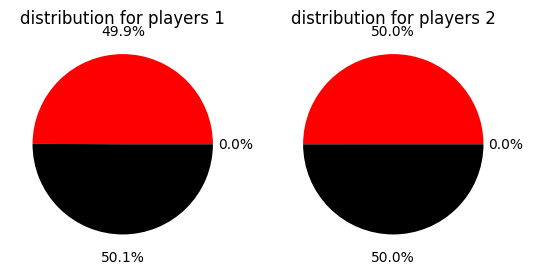

In [89]:
fig, ax = plt.subplots(1,2)

wins=[turn[id]['won'] for id in ids for turn in history]
ax[0].pie([wins.count('red'), wins.count('black'), wins.count('green')],
        colors=['red', 'black', 'green'],
        autopct='%1.1f%%',
        pctdistance=1.25,
        labeldistance=.6)
ax[0].set_title('distribution for players 1')

wins=[turn[id]['won'] for id in ids2 for turn in history2]
ax[1].pie([wins.count('red'), wins.count('black'), wins.count('green')],
        colors=['red', 'black', 'green'],
        autopct='%1.1f%%',
        pctdistance=1.25,
        labeldistance=.6)
ax[1].set_title('distribution for players 2')

Poté si zjistíme kolikrát kdo vyhrál z hlediska kombinatoriky bychom se měli blížít k 50% ať je naše strategie jakákoli

In [90]:
is_win=[turn[id]['won']==turn[id]['tip'] for id in ids for turn in history]
ratio=is_win.count(True)/len(is_win)
print(f'V {ratio} procentech her hráči jedna vyhráli.')

is_win=[turn[id]['won']==turn[id]['tip'] for id in ids2 for turn in history2]
ratio=is_win.count(True)/len(is_win)
print(f'V {ratio} procentech her hráči dva vyhráli.')

V 0.499151 procentech her hráči jedna vyhráli.
V 0.49991 procentech her hráči dva vyhráli.


profit hráčů na konci her v procentech

In [91]:
profits=[]
for id in ids:
    profits.append((history[-1][id]['balance']-money)/money)

profits2=[]
for id in ids2:
    profits2.append((history2[-1][id]['balance']-money2)/money2)  

průměr players: -0.0002, průměr players2: 0.0
median players: -0.0002, median players2: -0.0001


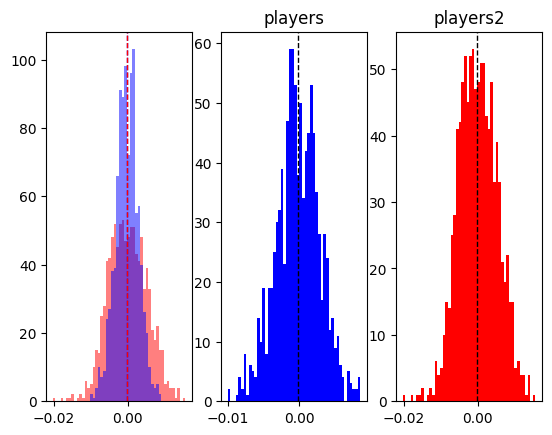

In [95]:
fig, ax=plt.subplots(1,3)

combined=[profits, profits2]
mean=np.array(profits).mean()
mean2=np.array(profits2).mean()

median=np.median(np.array(profits))
median2=np.median(np.array(profits2))

val=median
val2=median2

colors=['blue', 'red']


ax[0].hist(combined, bins=50, stacked=False, histtype='stepfilled', color=colors, alpha=0.5)
ax[0].axvline(val, linestyle='dashed', linewidth=1, color='blue')
ax[0].axvline(val2, linestyle='dashed', linewidth=1, color='red')

ax[1].hist(profits, bins=50, histtype='stepfilled', color=colors[0])
ax[1].axvline(val, color='k', linestyle='dashed', linewidth=1)
ax[1].set_title(f'players')

ax[2].hist(profits2, bins=50, histtype='stepfilled', color=colors[1])
ax[2].axvline(val2, color='k', linestyle='dashed', linewidth=1)
ax[2].set_title(f'players2')

print(f'průměr players: {round(mean, 4)}, průměr players2: {round(mean2, 4)}')
print(f'median players: {round(median, 4)}, median players2: {round(median2, 4)}')

(array([  2.,   5.,  18.,  92., 228., 256., 218., 126.,  45.,  10.]),
 array([-0.0203, -0.0167, -0.0131, -0.0095, -0.0059, -0.0023,  0.0013,
         0.0049,  0.0085,  0.0121,  0.0157]),
 <BarContainer object of 10 artists>)

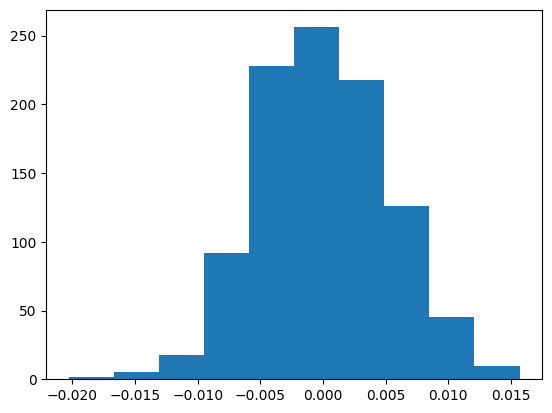